# Exercise 1: Python and sounds

This exercise aims to get familiar with some basic audio operations using Python. There are four parts to it: 1) Reading an audio file, 2) Basic operations with audio, 3) Python array indexing, and 4) Downsampling audio - Changing the sampling rate. 

Before doing the exercise, please go through the general information for all the exercises given in `README.txt` of the `notebooks` directory. 

### Relevant concepts

__Python:__ Python is a powerful and easy to learn programming language, which is used in a wide variety of application areas. More information in https://www.python.org/. We will use python in all the exercises and in this first one you will start learning about it by performing some basic operations with sound files. 

__Jupyter notebooks:__ Jupiter notebooks are interactive documents containing live code, equations, visualizations and narrative text. More information in https://jupyter.org/. It supports Python and all the exercises here use it.

__Wav file:__ The wav file format is a lossless format to store sounds on a hard drive. Each audio sample is stored as a 16 bit integer number (sometimes also as 24 bit integer or 32 bit float). In this course we will work with only one type of audio files. All the sound files we use in the assignments should be wav files that are mono (one channel), in which the samples are stored in 16 bits, and that use (most of the time) the sampling rate of 44100 Hz. Once read into python, the samples will be converted to floating point values with a range from -1 to 1, resulting in a one-dimensional array of floating point values.

## Part 1 - Reading in an audio file
The `read_audio_samples()` function bellow should read an audio file and return a specified number of consecutive samples of the file starting at a given sample. 

The input to the function is the file name (including the path), plus the location of first sample and the number of consecutive samples to take, and the output should be a numpy array.

If you use the `wavread()` function from the `utilFunctions` module available in the `software/models` directory, the input samples will be automatically converted to a numpy array of floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## Make plots wider
plt.rcParams["figure.figsize"] = [14,7]

sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite


In [2]:
# E1 - 1.1: Complete the read_audio_samples() function

def read_audio_samples(input_file, first_sample=50001, num_samples=10):
    """Read num_samples samples from an audio file starting at sample first_sample
    
    Args:
        input_file (str): path of a wav file      
    
    Returns:
        np.array: numpy array containing the selected samples
    
    """
    
    ## Read wavfile
    (fs, x) = wavread(input_file)
    
    # Compute the correct starting sample
    starting_sample = first_sample - 1;

    # Return sliced part of the array
    return x[starting_sample : starting_sample + num_samples]

You can use as input the sound files from the sounds directory, thus using a relative path to it. If you run the `read_audio_samples()` function using the `piano.wav` sound file as input, with the default arguments, it should return the following samples:
```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997, 0.00769066, 0.02319407, 0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

In [3]:
# E1 - 1.2: Call read_audio_samples() with the proposed input sound and default arguments

read_audio_samples('../sounds/piano.wav')


array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,
        0.02319407,  0.03503525,  0.04309214,  0.04626606,  0.0441908 ],
      dtype=float32)

## Part 2 - Basic operations with audio

The function `minMaxAudio()` should read an audio file and return the minimum and  maximum values of the audio samples in that file. The input to the function is the wav file name (including the path) and the output should be two floating point values returned as a tuple.

In [4]:
# E1 - 2.1: Complete function minMaxAudio()

def min_max_audio(input_file):
    """Compute the minimum and maximum values of the audio samples in the input file
    
    Args:
        inputFile(str): file name of the wav file (including path)
    
    Returns:
        tuple: minimum and maximum value of the audio samples, like: (min_val, max_val)
    """
    ### Your code here

    (fs, x) = wavread(input_file)

    return (x.min(), x.max())


If you run `min_max_audio()` using `oboe-A4.wav` as input, it should return the following output: 

```
(-0.83486432, 0.56501967)
```

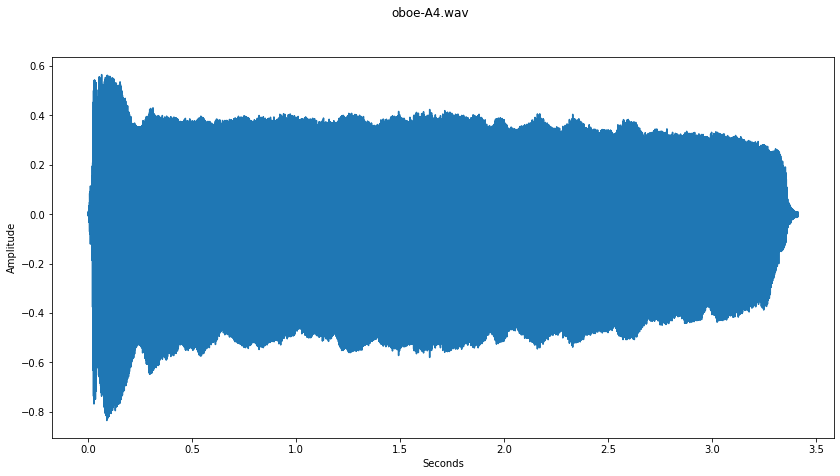

(-0.8348643, 0.56501967)

In [5]:
# E1 - 2.2: Plot input sound with x-axis in seconds, and call min_max_audio() with the proposed sound file

### Your code here
file = '../sounds/oboe-A4.wav'
fs, x = wavread(file)

time_x = np.arange(x.size)/float(fs)
plt.plot(time_x, x)
plt.suptitle('oboe-A4.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()

min_max_audio(file)

## Part 3 - Python array indexing

For the function `hop_samples()`, given a numpy array `x`, it should return every Mth element of `x`, starting from the first element. The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of elements in `x`. The output of this function should be a numpy array.

In [6]:
# E1 - 3.1: Complete the function hop_samples()

def hop_samples(x, M):
    """Return every Mth element of the input array
    
    Args:
        x(np.array): input numpy array
        M(int): hop size (positive integer)
    
    Returns:
        np.array: array containing every Mth element in x, starting from the first element in x
    """
    ## Your code here

    if M < 0:
        raise ValueError("M must be positive")
        
    if M >= x.size:
        raise ValueError("M cannot be equal or bigger than x")

    filtered = []
    i=0
    
    while (i < x.size):
        filtered.append(x[i])
        i=i+M

    return np.array(filtered)


If you run the function`hop_samples()` with `x = np.arange(10)` and `M = 2` as inputs, it should return: 

```
array([0, 2, 4, 6, 8])
```

[0 2 4 6 8]


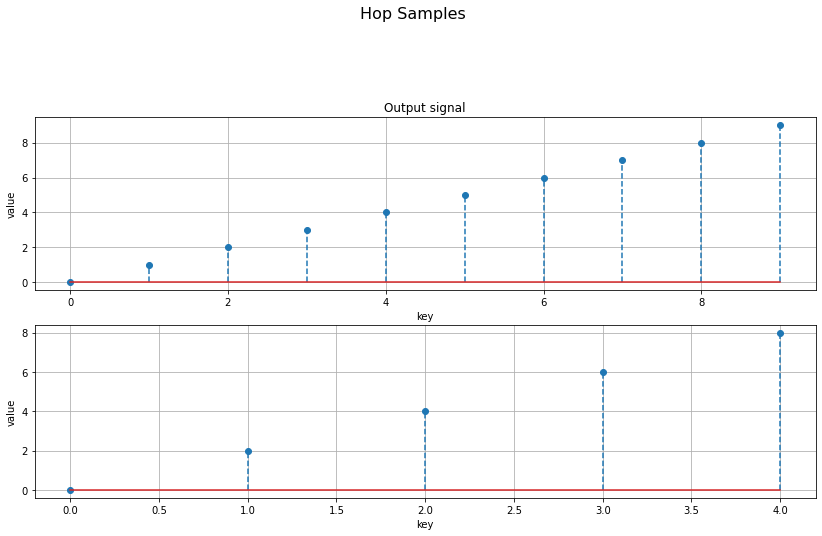

In [7]:
# E1 - 3.2: Plot input array, call hop_samples() with proposed input, and plot output array

M = 2

fig, (ax1, ax2) = plt.subplots(2)
input_array = np.arange(10)

fig.suptitle('Hop Samples', size=16, y=1.10)

ax1.stem(input_array, linefmt='--')
ax1.set_title('Input signal', pad=20)
ax1.set_xlabel('key')
ax1.set_ylabel('value')
ax1.grid(True)

output = hop_samples(input_array, M)
print(output)

ax2.stem(np.arange(output.size), output, linefmt='--')
ax1.set_title('Output signal')
ax2.set_xlabel('key')
ax2.set_ylabel('value')
ax2.grid(True)

plt.show()


## Part 4 - Downsampling


One of the required processes to represent an analog signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. Here you will learn a simple way of changing the original sampling rate of a sound to a lower sampling rate, and will learn the implications it has in the audio quality.

The function `down_sample_audio()` has as input an audio file with a given sampling rate, it should apply downsampling by a factor of `M` and return a down-sampled version of the input samples. The sampling rates and downsampling factors to use have to be integer values.

From the output samples if you need to create a wav audio file from an array, you can use the `wavwrite()` function from the `utilFunctions.py` module. However, in this exercise there is no need to write an audio file, we will be able to hear the sound without creating a file, just playing the array of samples.

In [8]:
# E1 - 4.1: Complete function down_sample_audio()

def down_sample_audio(input_file, M):
    """Downsample by a factor of M the input signal
    
    Args:
        input_file(str): file name of the wav file (including path)
        M(int): downsampling factor (positive integer)
        
    Returns:
        tuple: input samples (np.array), original sampling rate (int), down-sampled signal (np.array), 
               and new sampling rate (int), like: (x, fs, y, fs_new) 
    """
    ### Your code here
    if (M <= 0):
        raise ValueError("M must be positive")

    (fs, x) = wavread(input_file)

    new_fs = int(fs/M)
    
    return (x, fs, hop_samples(x, M), new_fs)



Test cases for `down_sample_audio()`:

_Test Case 1:_ Use the file from the sounds directory `vibraphone-C6.wav` and a downsampling factor of `M=14`.

_Test Case 2:_ Use the  file from the sounds directory `sawtooth-440.wav` and a downsampling factor of `M=14`.

To play the output samples, import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=y, rate=fs_new))`. To visualize the output samples import the `matplotlib.pyplot` package and use `plt.plot(x)`.

You can find some related information in https://en.wikipedia.org/wiki/Downsampling_(signal_processing)

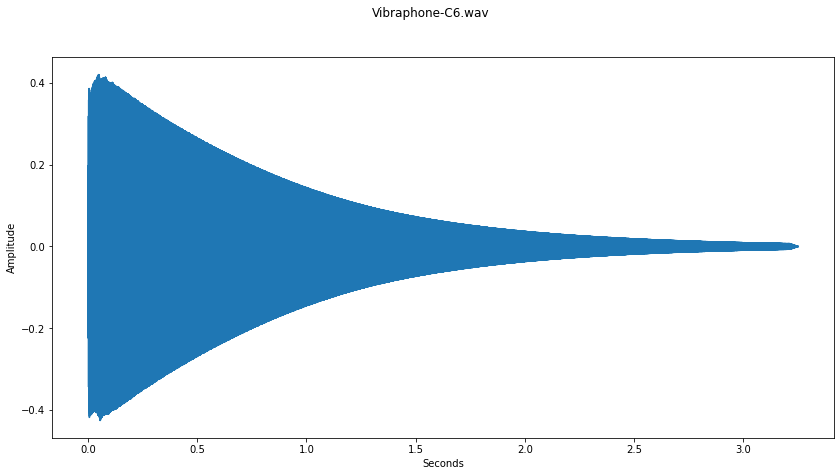

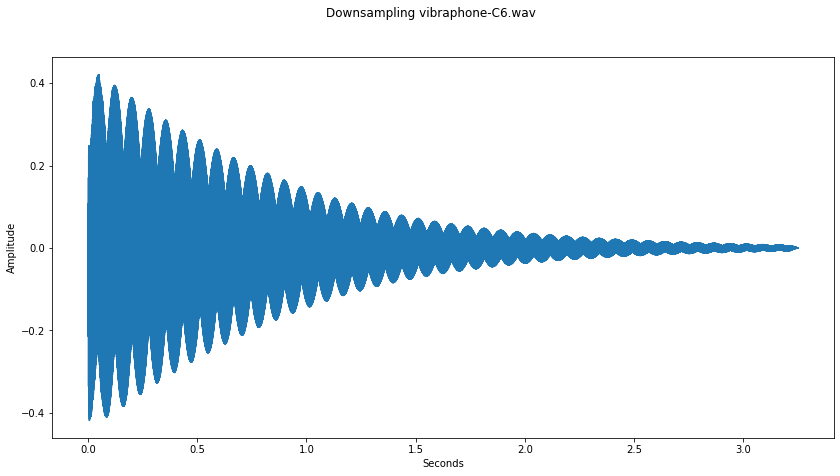

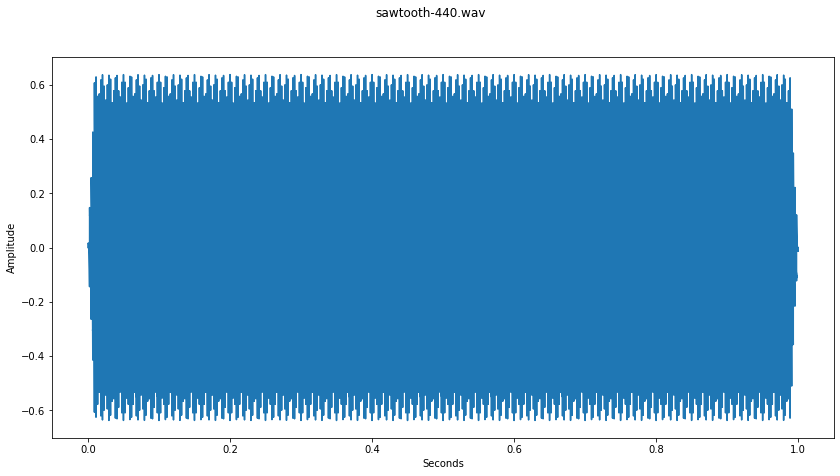

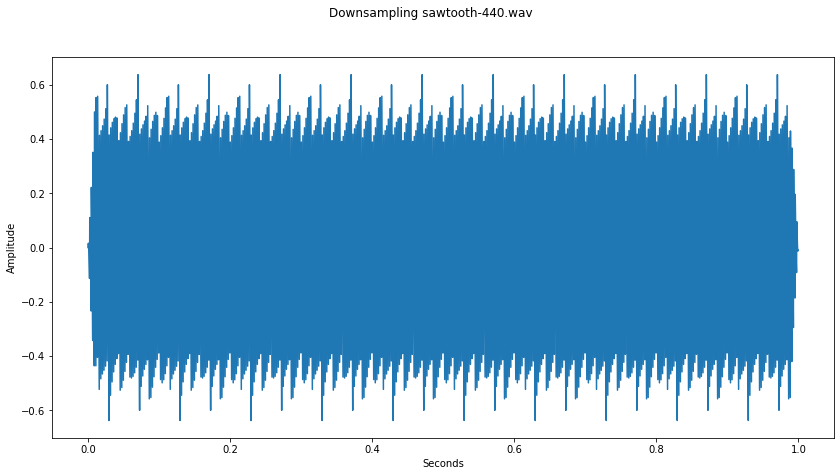

In [11]:
# E1 - 4.2: Plot and play input sounds, call the function down_sample_audio() for the two test cases, 
# and plot and play the output sounds. 

### Case 1: vibraphone-c6 ###

x_one, fs, downsampled_signal, new_fs = down_sample_audio('../sounds/vibraphone-C6.wav', 14)

time_x_one = np.arange(x_one.size)/float(fs)
time_downsampled = np.arange(downsampled_signal.size)/float(new_fs)

## INPUT SOUND CASE 1
ipd.display(ipd.Audio(data=x_one, rate=fs))
plt.plot(time_x_one, x_one)
plt.suptitle('Vibraphone-C6.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()

## OUTPUT SOUND CASE 1
ipd.display(ipd.Audio(data=downsampled_signal, rate=new_fs))

plt.plot(time_downsampled, downsampled_signal)
plt.suptitle('Downsampling vibraphone-C6.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()

### Case 2: SAWTOOTH-440.wav ###
x_two, fs, downsampled_signal, new_fs = down_sample_audio('../sounds/sawtooth-440.wav', 14)
time_x_two = np.arange(x_two.size)/float(fs)
time_downsampled = np.arange(downsampled_signal.size)/float(new_fs)

## INPUT SOUND CASE 1
ipd.display(ipd.Audio(data=x_two, rate=fs))
plt.plot(time_x_two, x_two)
plt.suptitle('sawtooth-440.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()

## OUTPUT SOUND CASE 2
ipd.display(ipd.Audio(data=downsampled_signal, rate=new_fs))
plt.plot(time_downsampled, downsampled_signal)
plt.suptitle('Downsampling sawtooth-440.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()


In [10]:
# E1 - 4.3: Explain the results of part 4. What happened to the output signals compared to the input ones? 
# Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

"""
The output signals have fewer samples because we have got every Mth sample. By doing this, we are compressing our signal lossly.
Printed waveforms unlike the input ones, have the same time duration but are populated with fewer data points.

That downsampling has affected both signals, but more specially to the second one because if we listen to the sawtooth-440 
downsampled signal we can appreciate clearly the aliasing.

Downsampled saw-tooth signal has aliasing. Those alias frequencies add some kind of distortion to the sound hence, it modifies the sound itself.

We could avoid damaging the signal by adding a low-pass filter (anti-aliasing-filter) with a cutoff frequency of new_fs/2 
before starting to discard samples in order to reduce the bandwidth of the resulting signals.

"""

'\nThe output signals have fewer samples because we have got every Mth sample. By doing this, we are compressing our signal lossly.\nPrinted waveforms unlike the input ones, have the same time duration but are populated with fewer data points.\n\nThat downsampling has affected both signals, but more specially to the second one because if we listen to the sawtooth-440 \ndownsampled signal we can appreciate clearly the aliasing.\n\nDownsampled saw-tooth signal has aliasing. Those alias frequencies add some kind of distortion to the sound hence, it modifies the sound itself.\n\nWe could avoid damaging the signal by adding a low-pass filter (anti-aliasing-filter) with a cutoff frequency of new_fs/2 \nbefore starting to discard samples in order to reduce the bandwidth of the resulting signals.\n\n'